Statistical Summary:

        A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR  \
mean                                        36.9930   
median                                      37.0000   
min                                         31.6000   
max                                         37.7500   
std                                          0.2365   

        A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR  \
mean                                        91.1676   
median                                      85.6250   
min                                          7.1000   
max                                        172.4500   
std                                         58.7243   

        A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR  \
mean                                        60.1548   
median                                      60.0100   
min                                         53.2300   
max                                         79.0700   
std                                      

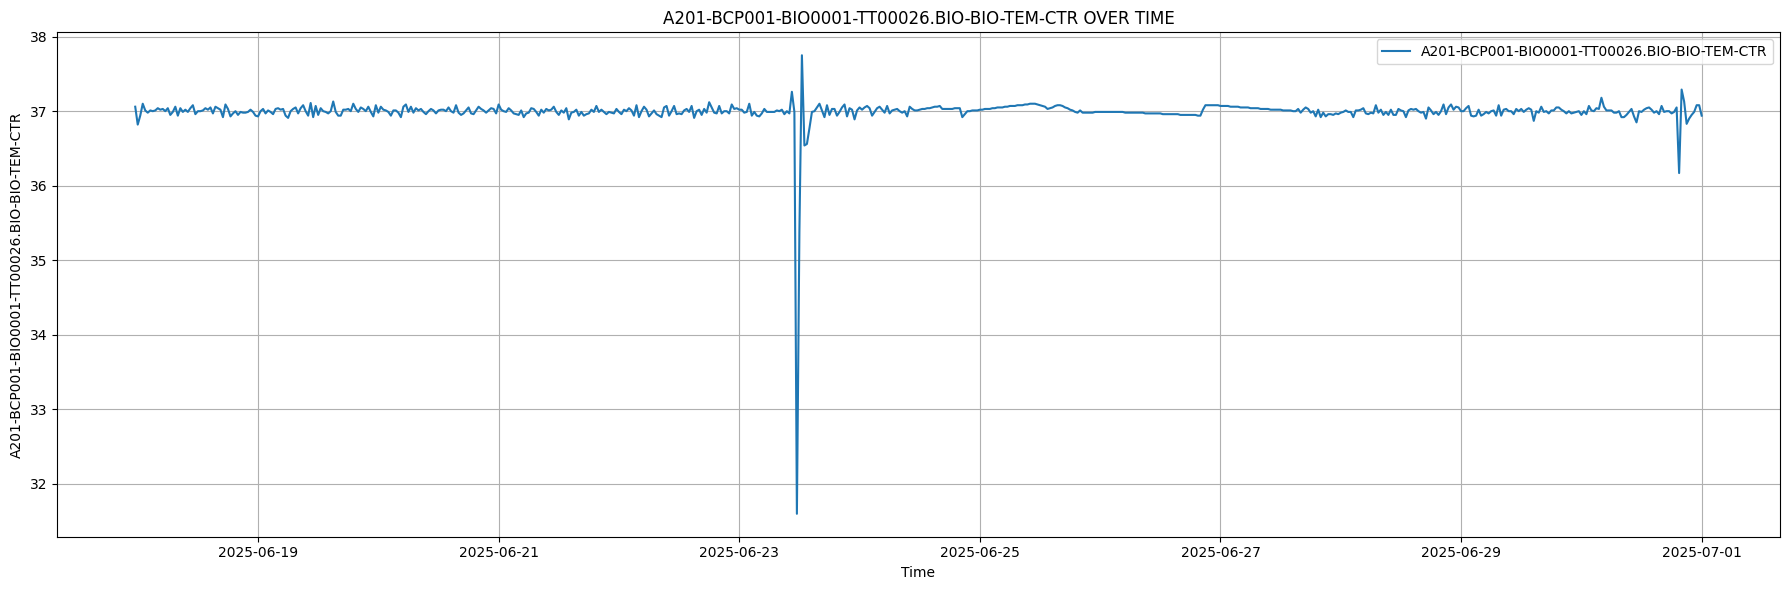

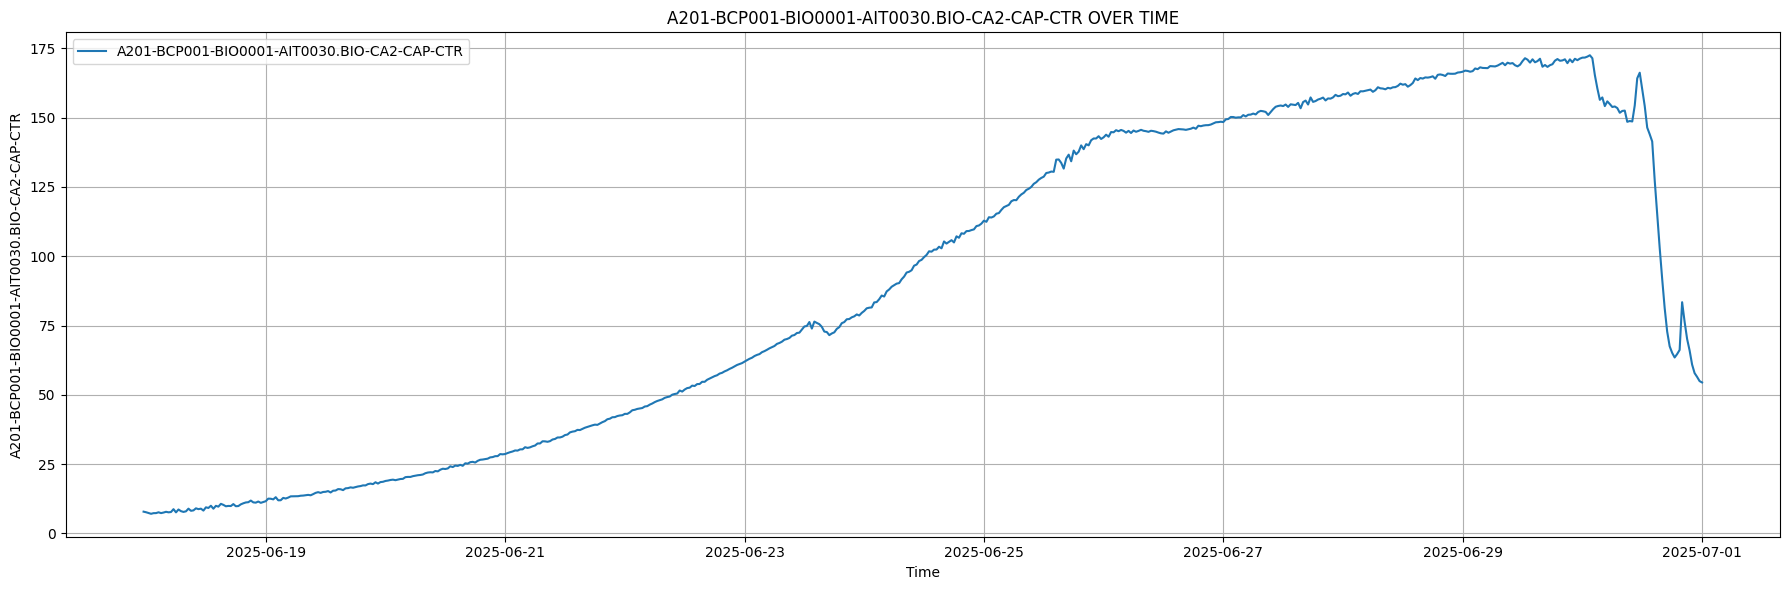

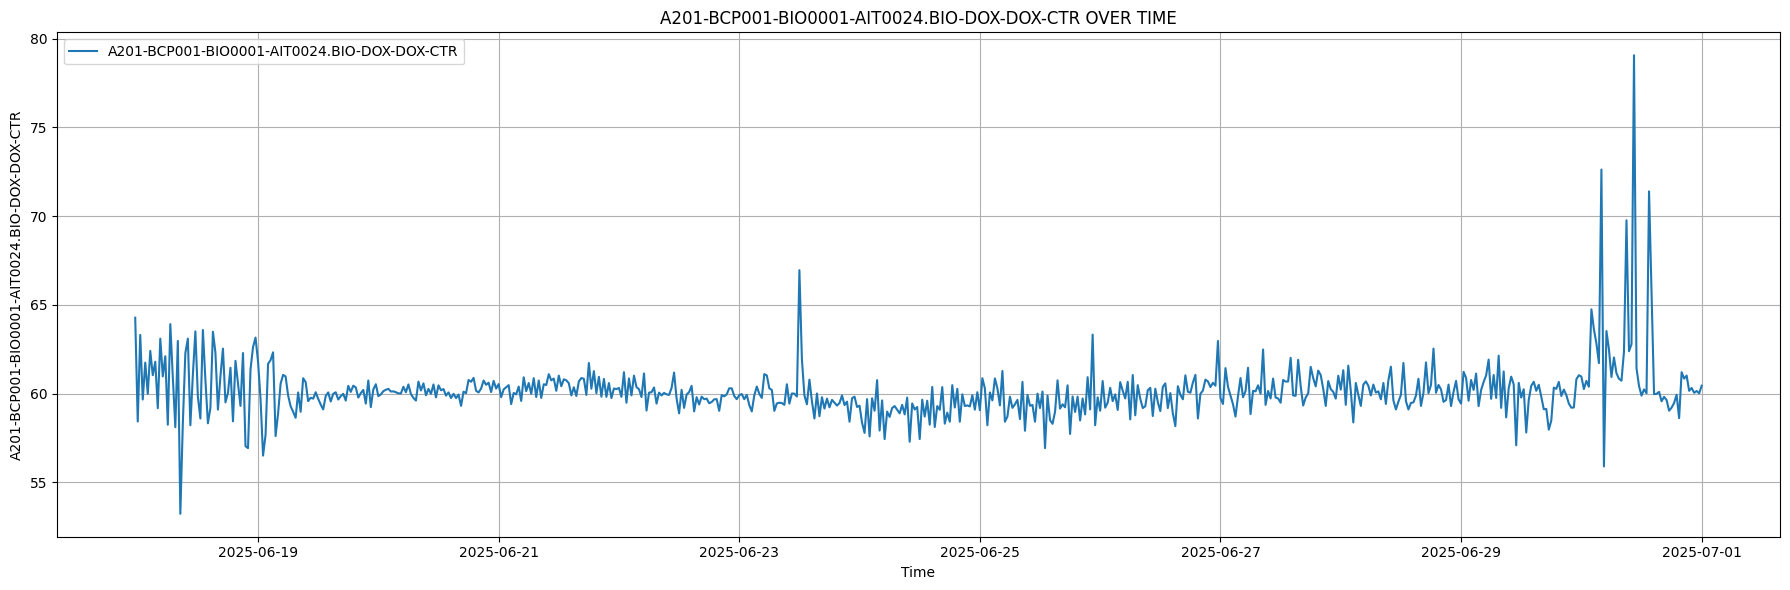

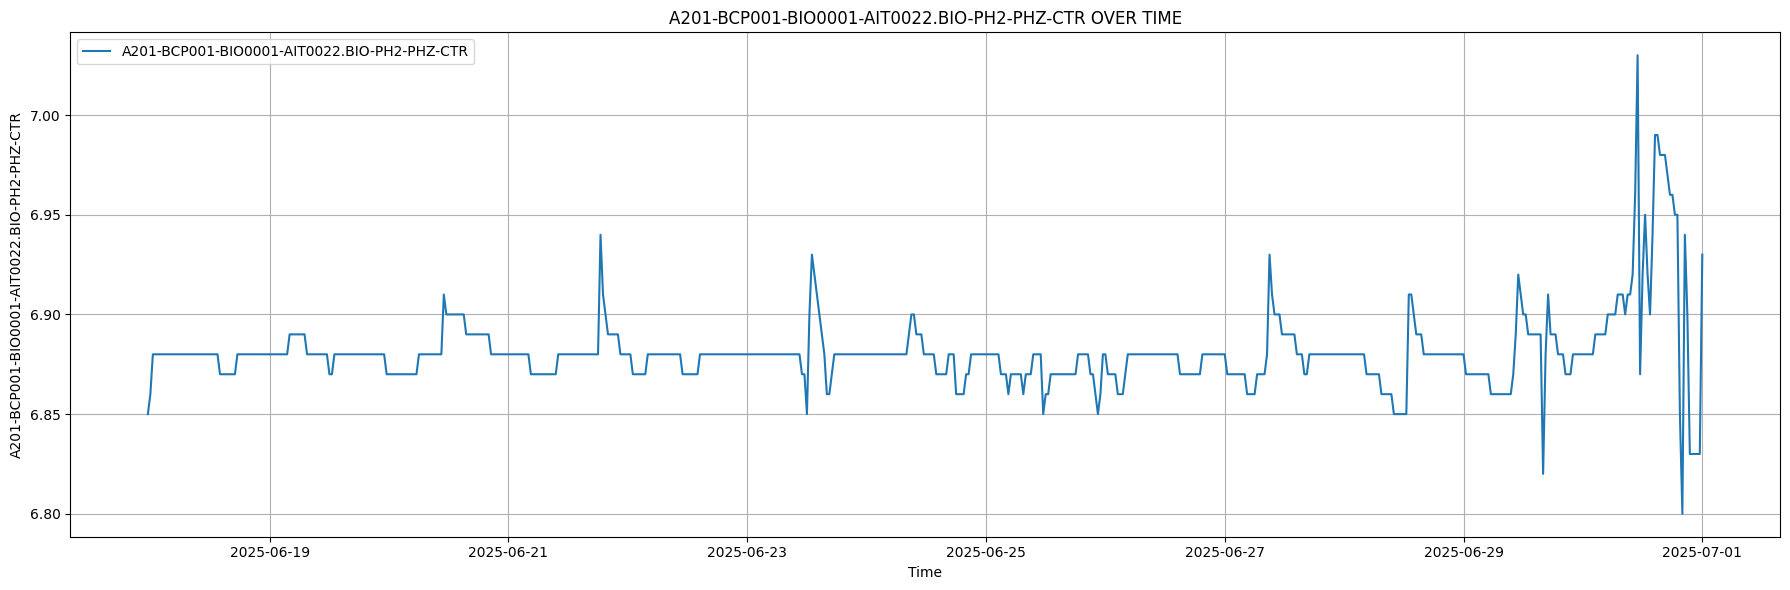

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\U1078446\Downloads\Processed_Data07242025041326PM0857DB658E8D1D2A.csv"
df = pd.read_csv(file_path)

# Parse the 'Time' column
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)

# Parameters to plot
parameters = df.columns.tolist()

# Print statistical summaries
summary = df[parameters].describe().loc[['mean', '50%', 'min', 'max', 'std']]
summary.rename(index={'50%': 'median'}, inplace=True)
summary = summary.map(lambda x: float(f"{x:.4f}"))

print("Statistical Summary:\n")
print(summary)

for param in parameters:
    plt.figure(figsize=(18, 6))
    plt.plot(df.index, df[param], label=param)
    plt.title(f'{param} OVER TIME')
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Statistical Summary:

        A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR  \
mean                                        36.9930   
median                                      37.0000   
min                                         31.6000   
max                                         37.7500   
std                                          0.2365   

        A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR  \
mean                                        91.1676   
median                                      85.6250   
min                                          7.1000   
max                                        172.4500   
std                                         58.7243   

        A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR  \
mean                                        60.1548   
median                                      60.0100   
min                                         53.2300   
max                                         79.0700   
std                                      

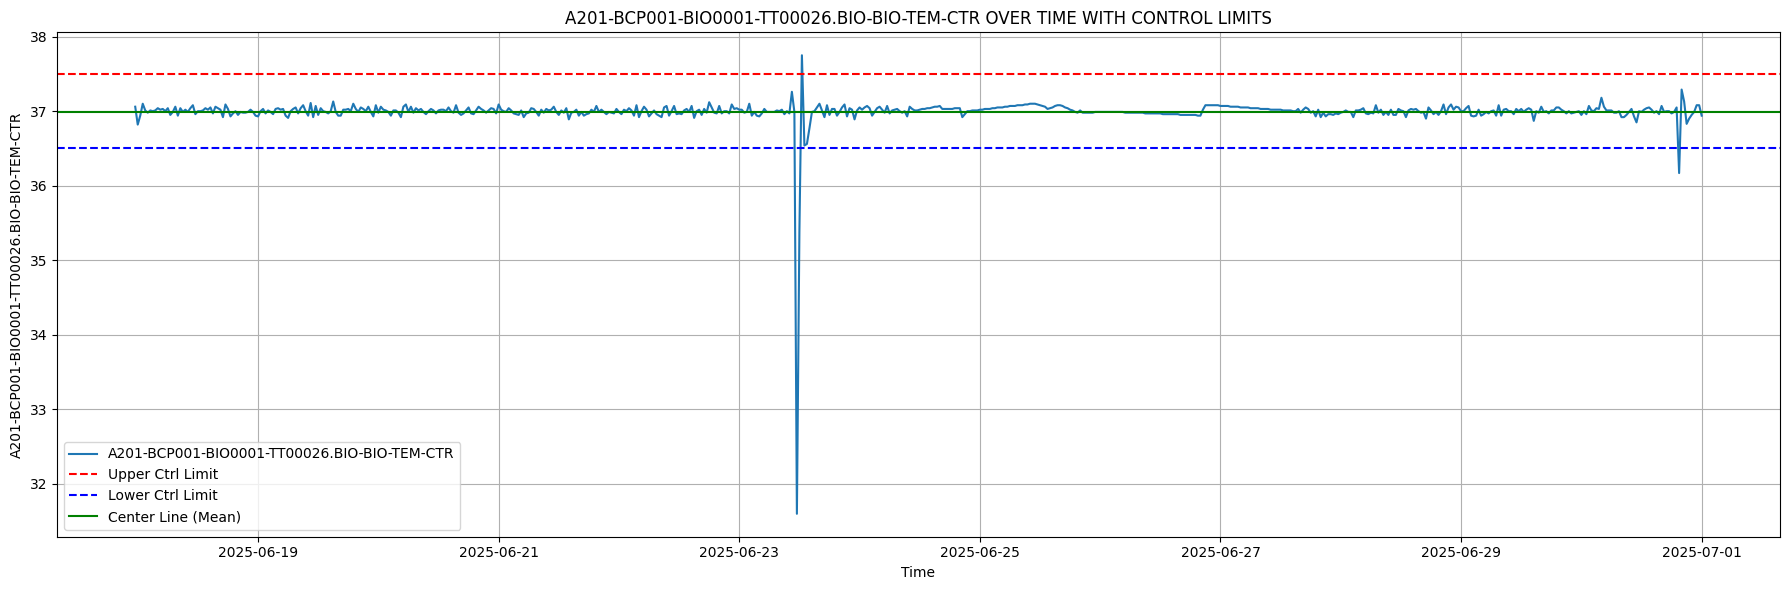

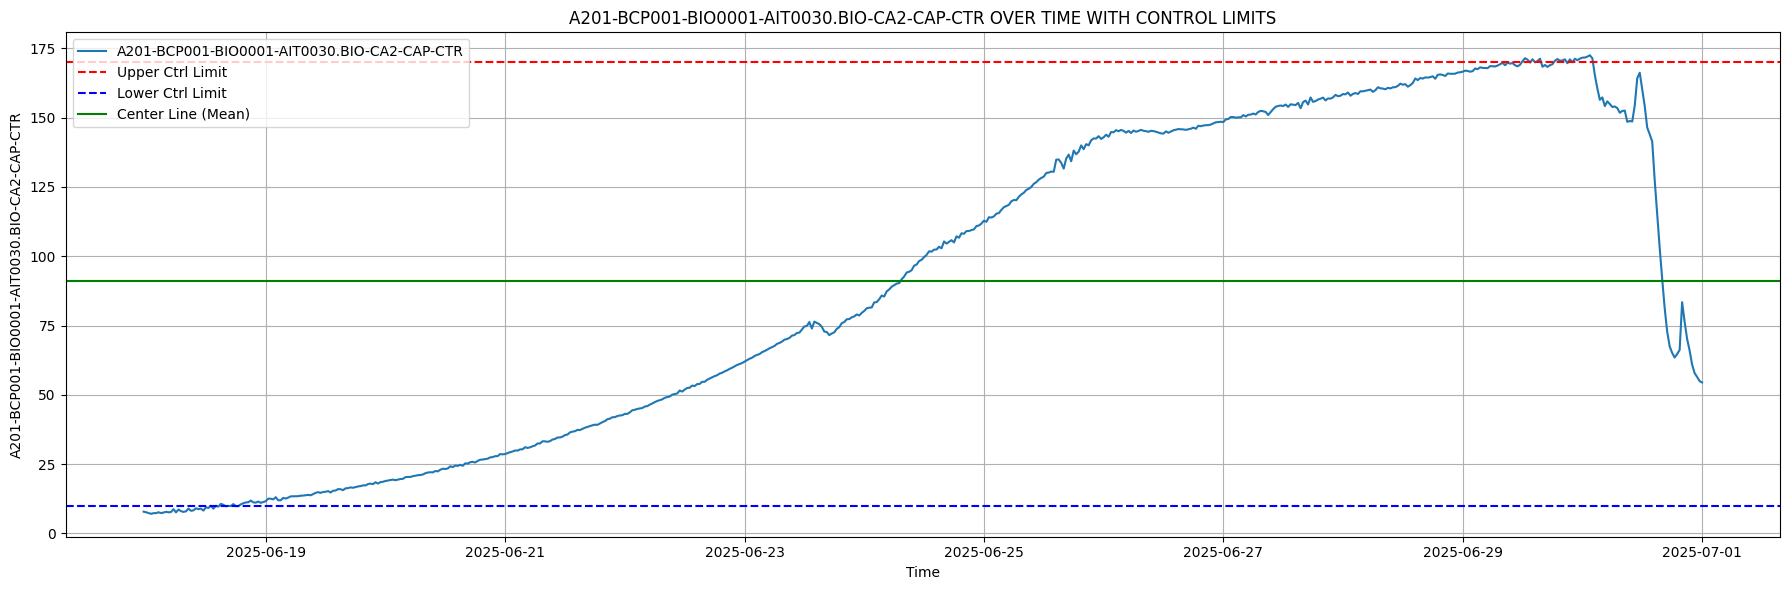

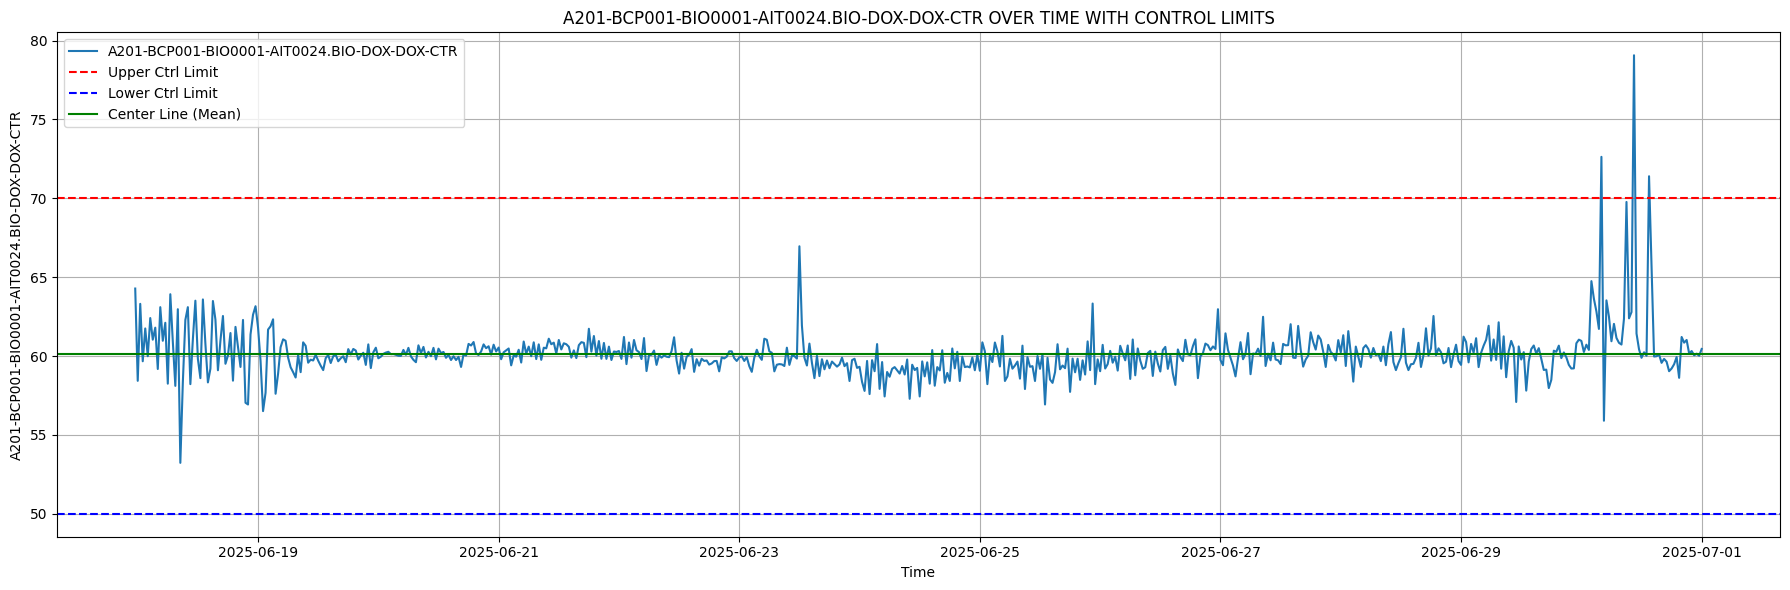

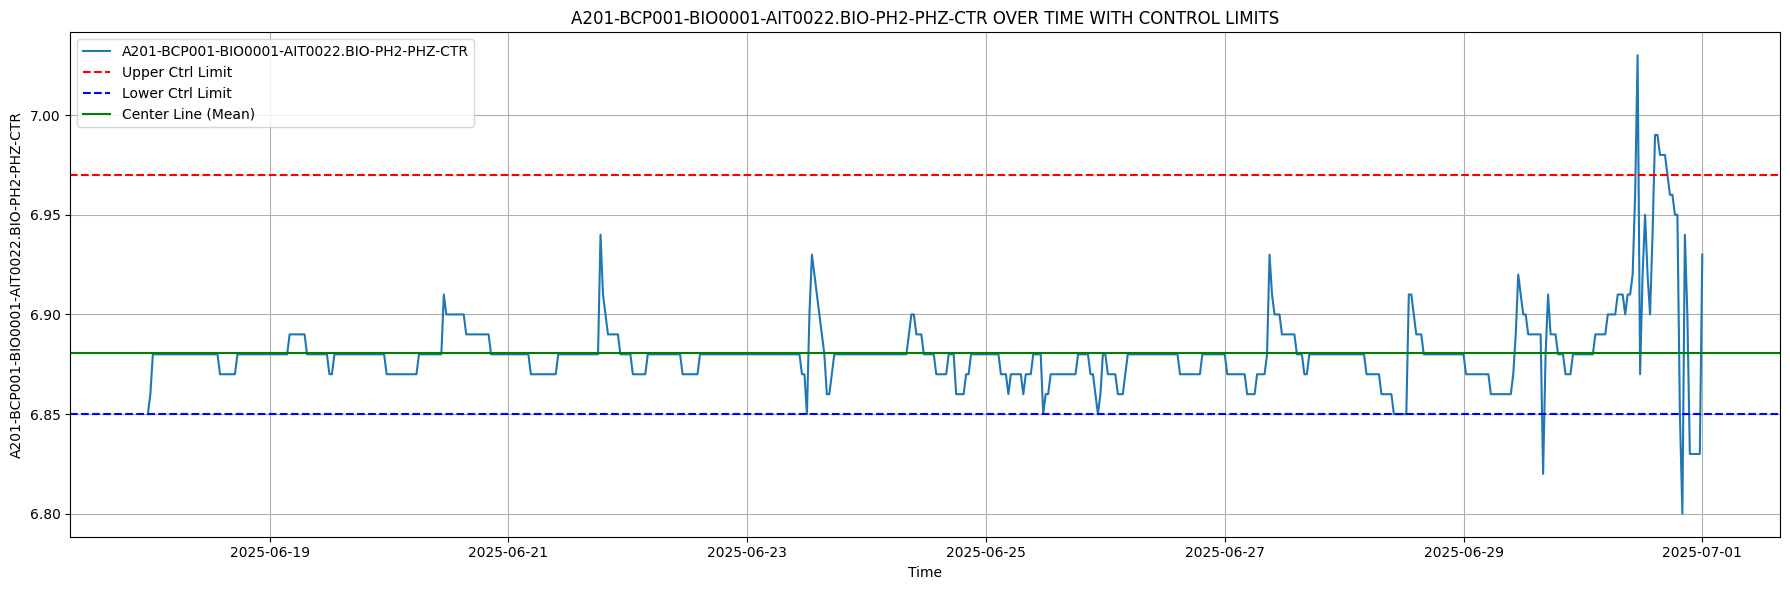

In [ ]:
# Statistical process control (SPC) analysis
# User-defined UCL and LCL values for each parameter

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\U1078446\Downloads\Processed_Data07242025041326PM0857DB658E8D1D2A.csv"
df = pd.read_csv(file_path)

# Parse the 'Time' column
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)

# Parameters to plot
parameters = df.columns.tolist()

# Define user-specified UCL and LCL values for each parameter
ucl_lcl_values = {}

# Assign control limits based on column position (0-based indexing)
if len(parameters) > 0:  # Column 0 (index 0) - Temperature
    ucl_lcl_values[parameters[0]] = {'UCL': 37.5, 'LCL': 36.5}

if len(parameters) > 1:  # Column 1 (index 1) - CAP
    ucl_lcl_values[parameters[1]] = {'UCL': 170.0, 'LCL': 10.0}

if len(parameters) > 2:  # Column 2 (index 2) - DO
    ucl_lcl_values[parameters[2]] = {'UCL': 70.0, 'LCL': 50.0}

if len(parameters) > 3:  # Column 3 (index 3) - PH
    ucl_lcl_values[parameters[3]] = {'UCL': 6.97, 'LCL': 6.85}

# Filter parameters to only include those with defined control limits
parameters = list(ucl_lcl_values.keys())

# Print statistical summaries
summary = df[parameters].describe().loc[['mean', '50%', 'min', 'max', 'std']]
summary.rename(index={'50%': 'median'}, inplace=True)
summary = summary.map(lambda x: float(f"{x:.4f}"))

print("Statistical Summary:\n")
print(summary)

# Plot each parameter with user-defined UCL and LCL
for param in parameters:
    plt.figure(figsize=(18, 6))
    plt.plot(df.index, df[param], label=param)
    plt.axhline(y=ucl_lcl_values[param]['UCL'], color='red', linestyle='--', label='Upper Ctrl Limit')
    plt.axhline(y=ucl_lcl_values[param]['LCL'], color='blue', linestyle='--', label='Lower Ctrl Limit')
    plt.axhline(y=df[param].mean(), color='green', linestyle='-', label='Center Line (Mean)')
    plt.title(f'{param} OVER TIME WITH CONTROL LIMITS')
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



Statistical Summary:

        A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR  \
mean                                        36.9930   
median                                      37.0000   
min                                         31.6000   
max                                         37.7500   
std                                          0.2365   

        A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR  \
mean                                        91.1676   
median                                      85.6250   
min                                          7.1000   
max                                        172.4500   
std                                         58.7243   

        A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR  \
mean                                        60.1548   
median                                      60.0100   
min                                         53.2300   
max                                         79.0700   
std                                      

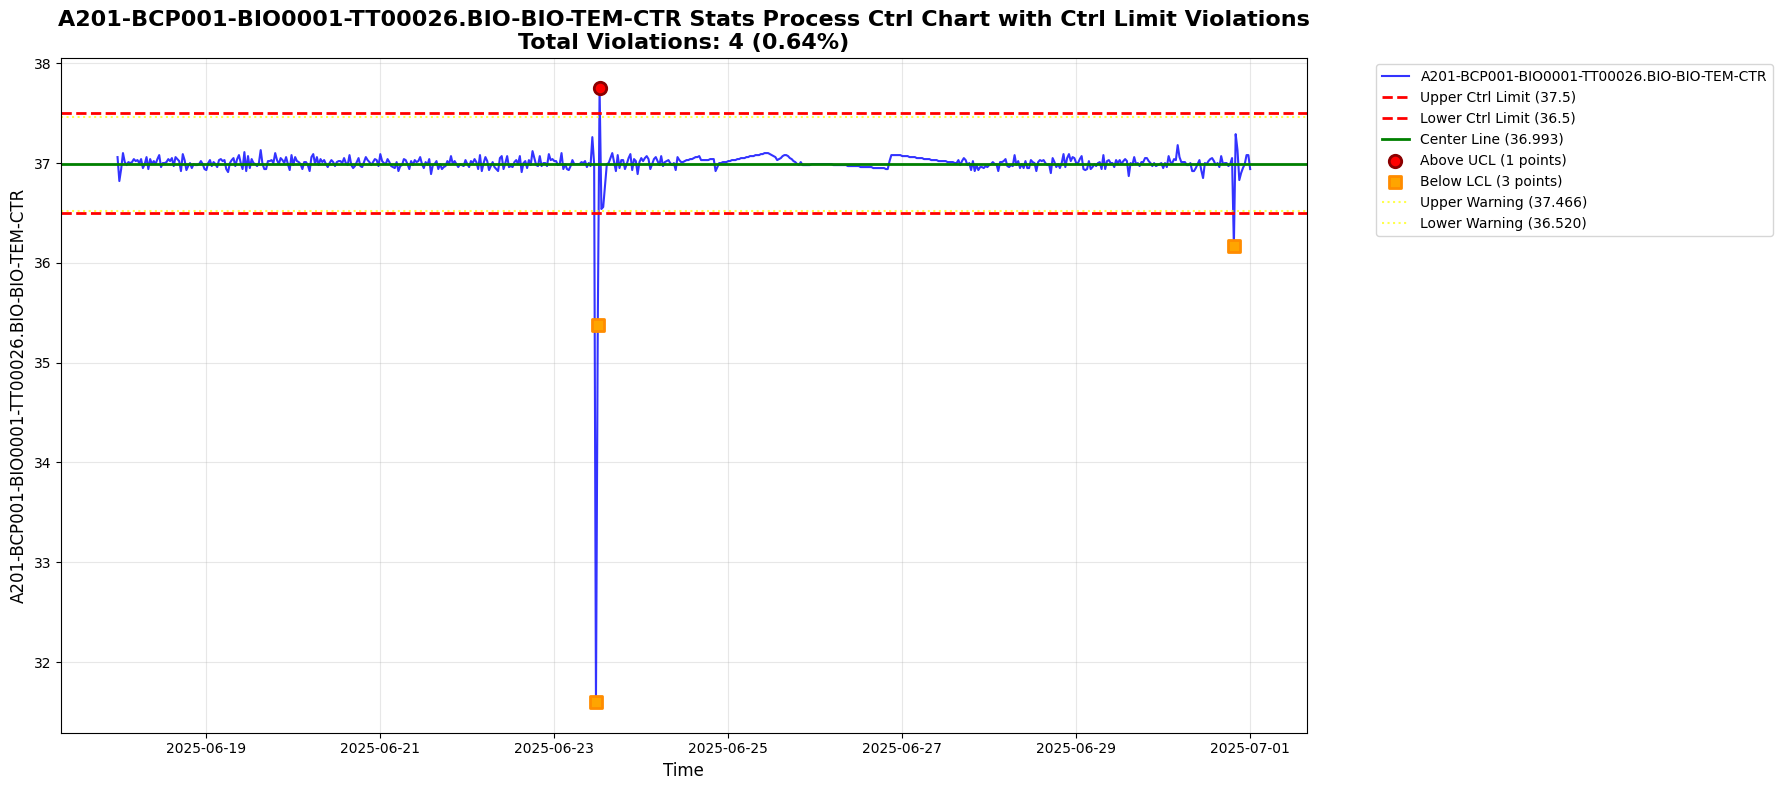

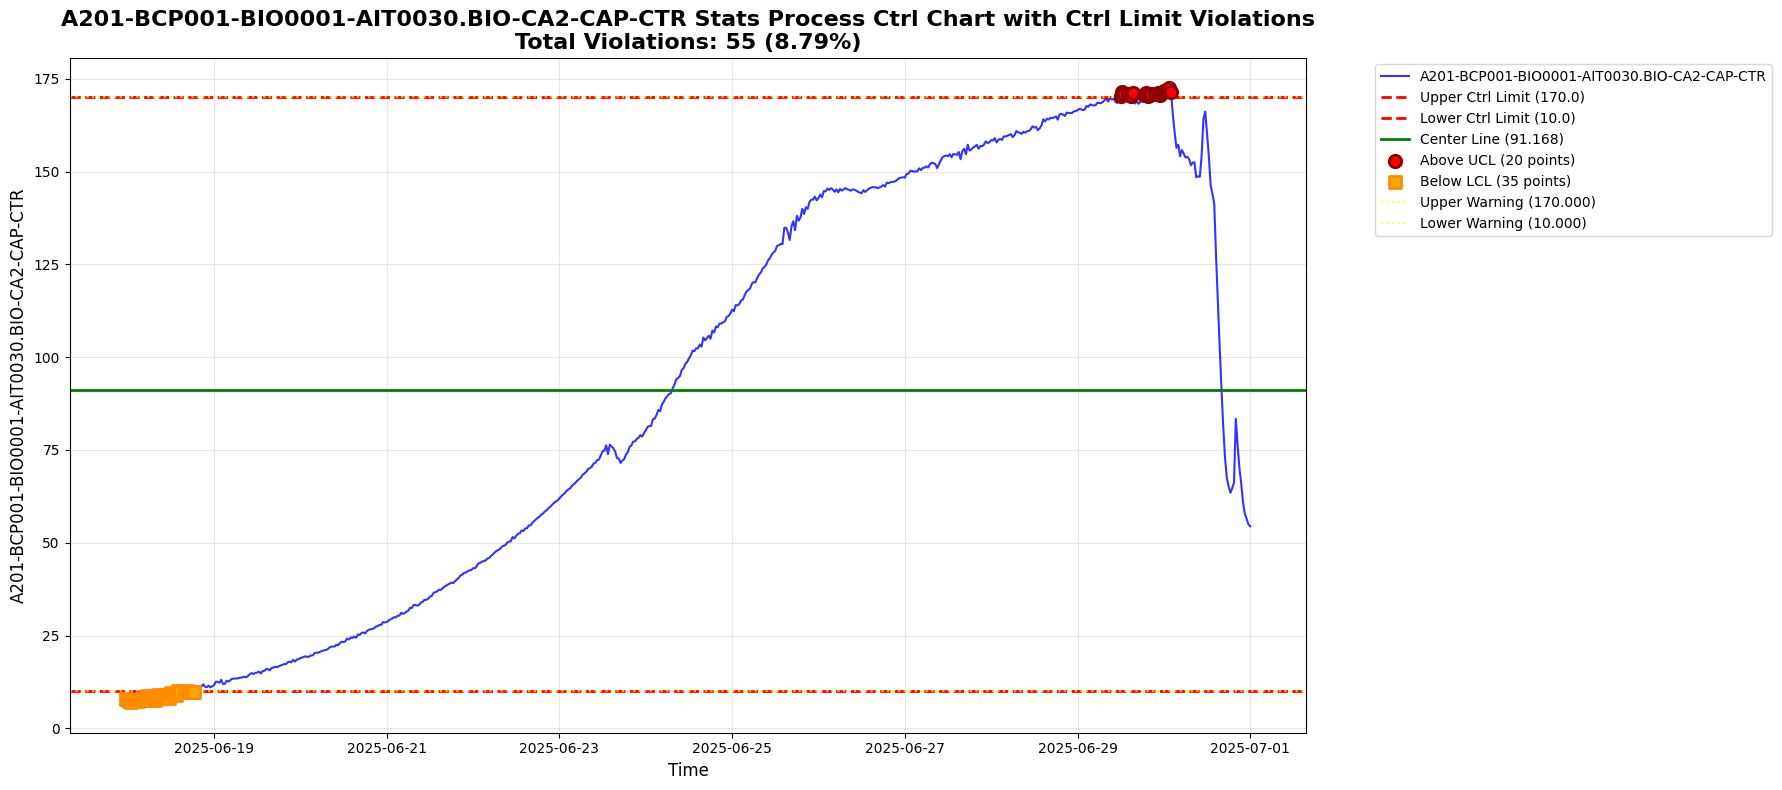

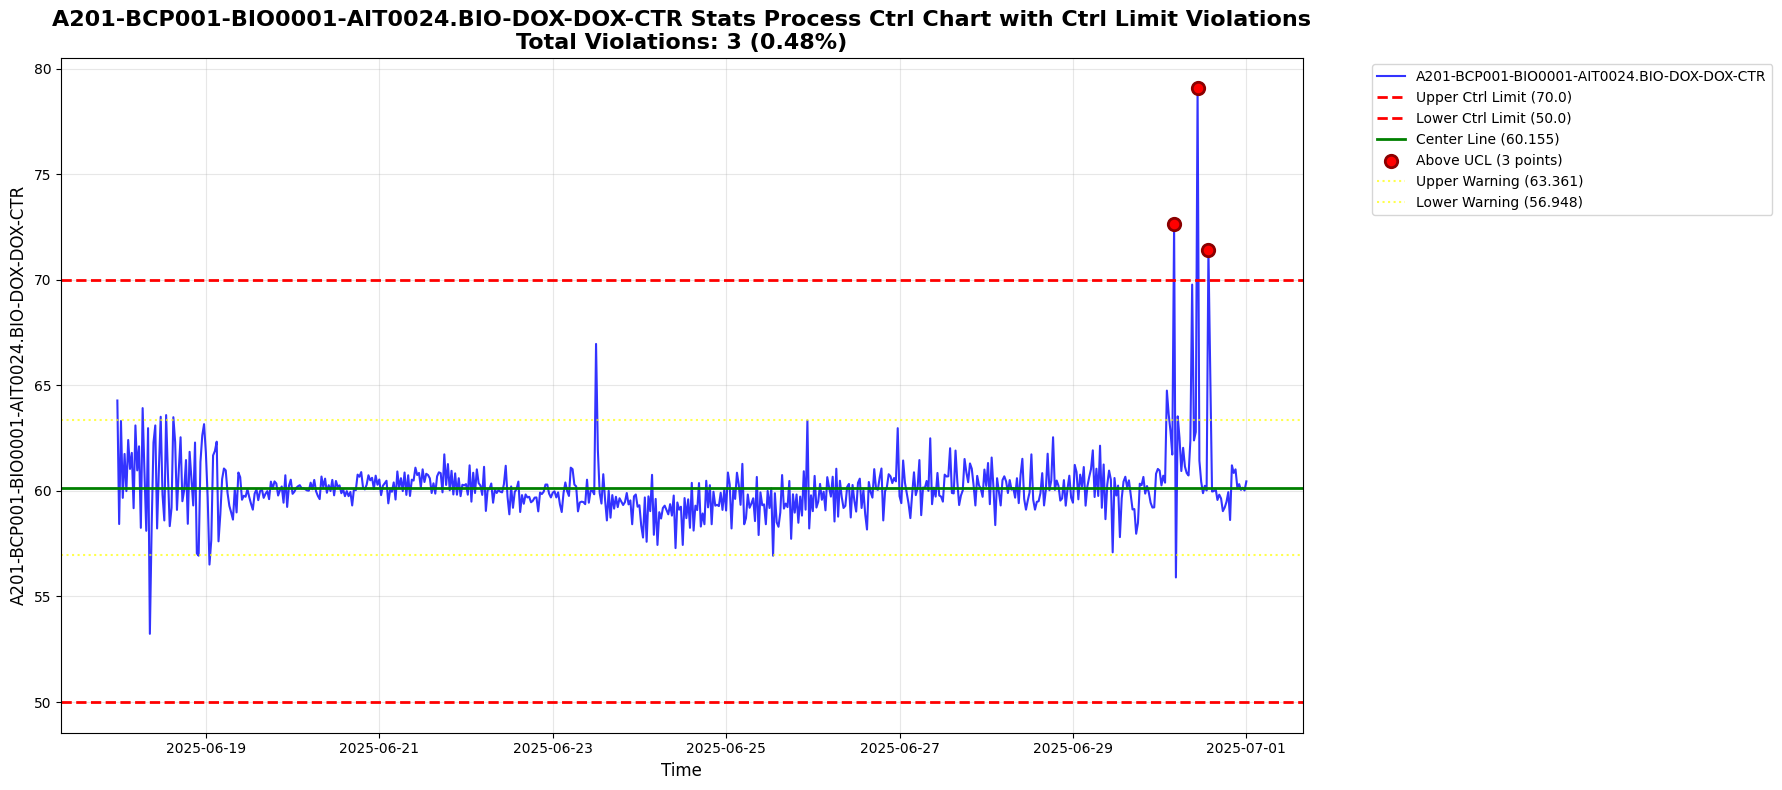

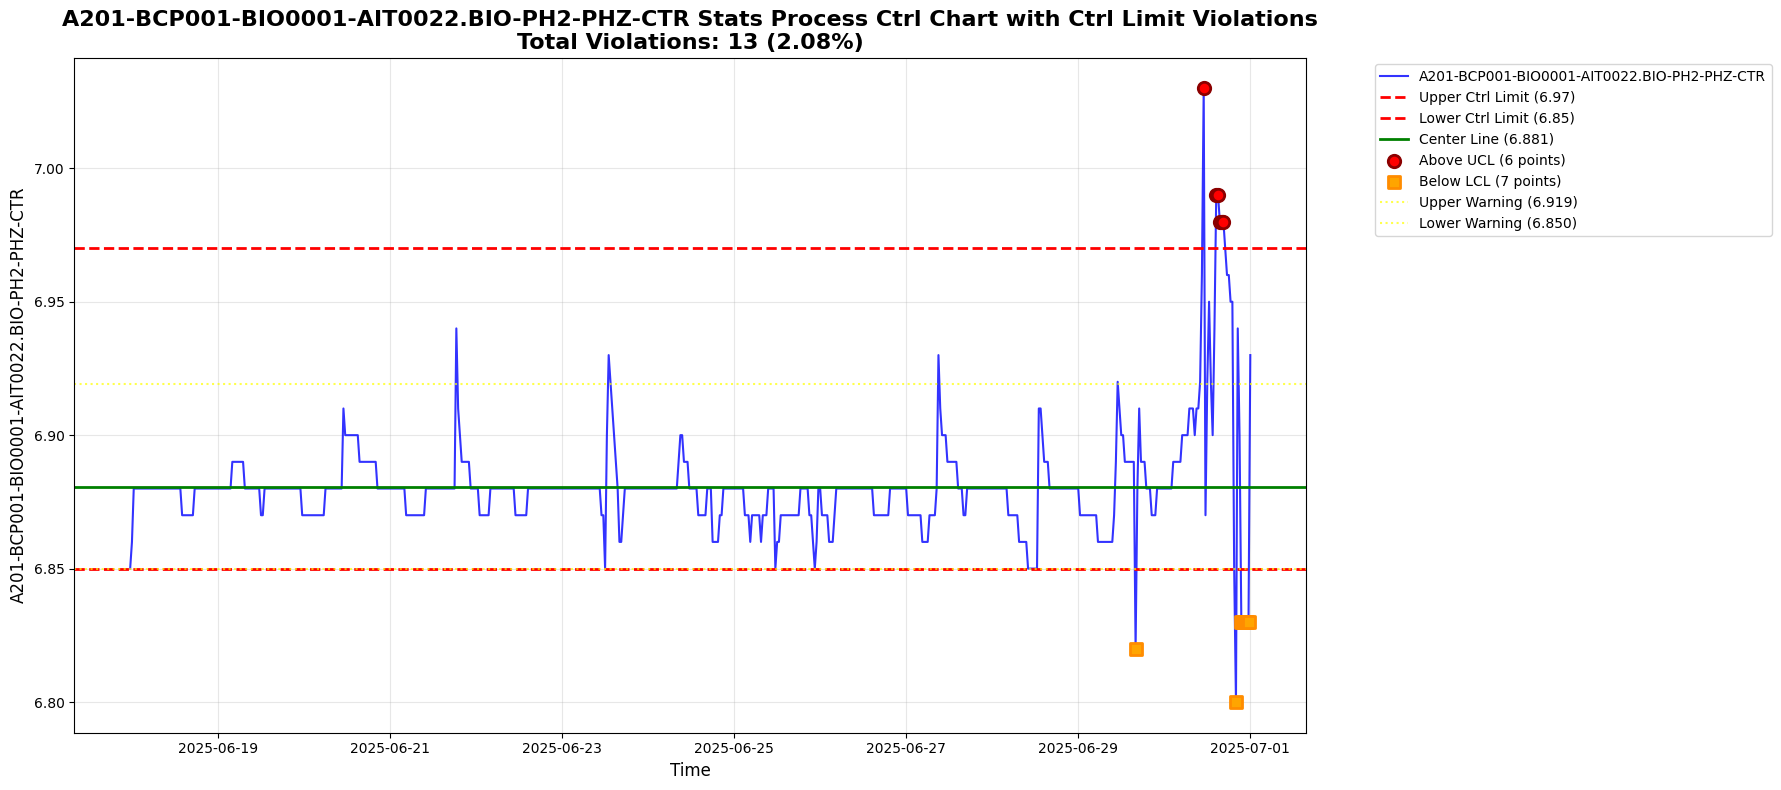

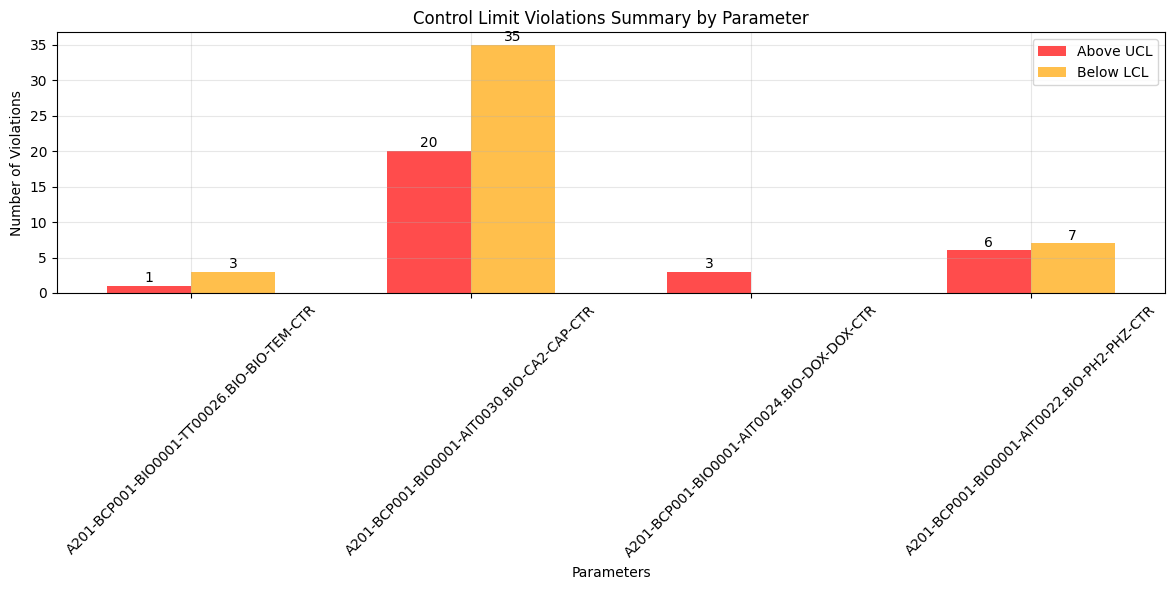


SPC ANALYSIS COMPLETE!
Key Features Added:
✅ Scatter points highlighting control limit violations
✅ Different markers for UCL (circles) vs LCL (squares) violations
✅ Warning zones at ±2 sigma from center line
✅ Detailed violation summary with timestamps
✅ Overall violation summary chart
✅ Violation rates calculated as percentage of total data points


In [10]:
# Statistical process control (SPC) analysis
# User-defined UCL and LCL values for each parameter

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = r"C:\Users\U1078446\Downloads\Processed_Data07242025041326PM0857DB658E8D1D2A.csv"
df = pd.read_csv(file_path)

# Parse the 'Time' column
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)

# Parameters to plot
parameters = df.columns.tolist()

# Define user-specified UCL and LCL values for each parameter
ucl_lcl_values = {}

# Assign control limits based on column position (0-based indexing)
if len(parameters) > 0:  # Column 0 (index 0) - Temperature
    ucl_lcl_values[parameters[0]] = {'UCL': 37.5, 'LCL': 36.5}

if len(parameters) > 1:  # Column 1 (index 1) - CAP
    ucl_lcl_values[parameters[1]] = {'UCL': 170.0, 'LCL': 10.0}

if len(parameters) > 2:  # Column 2 (index 2) - DO
    ucl_lcl_values[parameters[2]] = {'UCL': 70.0, 'LCL': 50.0}

if len(parameters) > 3:  # Column 3 (index 3) - PH
    ucl_lcl_values[parameters[3]] = {'UCL': 6.97, 'LCL': 6.85}

# Filter parameters to only include those with defined control limits
parameters = list(ucl_lcl_values.keys())

def identify_control_limit_violations(df, param, ucl, lcl):
    """
    Identify points that exceed upper or lower control limits
    
    Parameters:
    df: DataFrame with the data
    param: Parameter name (column name)
    ucl: Upper Control Limit
    lcl: Lower Control Limit
    
    Returns:
    dict with violations above UCL and below LCL
    """
    data = df[param].dropna()  # Remove any NaN values
    
    # Find violations
    above_ucl = data[data > ucl]
    below_lcl = data[data < lcl]
    
    violations = {
        'above_ucl': above_ucl,
        'below_lcl': below_lcl,
        'total_violations': len(above_ucl) + len(below_lcl),
        'violation_rate': (len(above_ucl) + len(below_lcl)) / len(data) * 100
    }
    
    return violations

def print_violation_summary(df, parameters, ucl_lcl_values):
    """
    Print a summary of control limit violations for all parameters
    """
    print("\n" + "="*60)
    print("CONTROL LIMIT VIOLATIONS SUMMARY")
    print("="*60)
    
    for param in parameters:
        ucl = ucl_lcl_values[param]['UCL']
        lcl = ucl_lcl_values[param]['LCL']
        violations = identify_control_limit_violations(df, param, ucl, lcl)
        
        print(f"\n{param}:")
        print(f"  Total violations: {violations['total_violations']}")
        print(f"  Violation rate: {violations['violation_rate']:.2f}%")
        print(f"  Above UCL ({ucl}): {len(violations['above_ucl'])} points")
        print(f"  Below LCL ({lcl}): {len(violations['below_lcl'])} points")
        
        # Print ALL timestamps of violations
        if len(violations['above_ucl']) > 0:
            print(f"  ALL Times above UCL:")
            for timestamp, value in violations['above_ucl'].items():
                print(f"    {timestamp}: {value:.4f}")
        
        if len(violations['below_lcl']) > 0:
            print(f"  ALL Times below LCL:")
            for timestamp, value in violations['below_lcl'].items():
                print(f"    {timestamp}: {value:.4f}")

def plot_spc_with_violations(df, param, ucl, lcl):
    """
    Plot SPC chart with control limit violations highlighted as scatter points
    
    Parameters:
    df: DataFrame with the data
    param: Parameter name to plot
    ucl: Upper Control Limit
    lcl: Lower Control Limit
    """
    plt.figure(figsize=(18, 8))
    
    # Plot the main line
    plt.plot(df.index, df[param], label=param, color='blue', linewidth=1.5, alpha=0.8)
    
    # Plot control limits
    plt.axhline(y=ucl, color='red', linestyle='--', linewidth=2, label=f'Upper Ctrl Limit ({ucl})')
    plt.axhline(y=lcl, color='red', linestyle='--', linewidth=2, label=f'Lower Ctrl Limit ({lcl})')
    plt.axhline(y=df[param].mean(), color='green', linestyle='-', linewidth=2, label=f'Center Line ({df[param].mean():.3f})')
    
    # Get violations
    violations = identify_control_limit_violations(df, param, ucl, lcl)
    
    # Scatter plot for points above UCL
    if len(violations['above_ucl']) > 0:
        plt.scatter(violations['above_ucl'].index, violations['above_ucl'].values, 
                   color='red', s=80, marker='o', zorder=5, 
                   label=f'Above UCL ({len(violations["above_ucl"])} points)', 
                   edgecolors='darkred', linewidth=2)
    
    # Scatter plot for points below LCL
    if len(violations['below_lcl']) > 0:
        plt.scatter(violations['below_lcl'].index, violations['below_lcl'].values, 
                   color='orange', s=80, marker='s', zorder=5, 
                   label=f'Below LCL ({len(violations["below_lcl"])} points)', 
                   edgecolors='darkorange', linewidth=2)
    
    # Add warning zones (optional - typically ±2 sigma from center line)
    mean_val = df[param].mean()
    std_val = df[param].std()
    upper_warning = min(mean_val + 2*std_val, ucl)
    lower_warning = max(mean_val - 2*std_val, lcl)
    
    plt.axhline(y=upper_warning, color='yellow', linestyle=':', alpha=0.7, label=f'Upper Warning ({upper_warning:.3f})')
    plt.axhline(y=lower_warning, color='yellow', linestyle=':', alpha=0.7, label=f'Lower Warning ({lower_warning:.3f})')
    
    # Formatting
    plt.title(f'{param} Stats Process Ctrl Chart with Ctrl Limit Violations\n'
              f'Total Violations: {violations["total_violations"]} ({violations["violation_rate"]:.2f}%)', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(param, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return violations

# Print statistical summaries
summary = df[parameters].describe().loc[['mean', '50%', 'min', 'max', 'std']]
summary.rename(index={'50%': 'median'}, inplace=True)
summary = summary.map(lambda x: float(f"{x:.4f}"))

print("Statistical Summary:\n")
print(summary)

# Print violation summary
print_violation_summary(df, parameters, ucl_lcl_values)

# Plot each parameter with enhanced SPC chart showing violations
violation_results = {}
for param in parameters:
    ucl = ucl_lcl_values[param]['UCL']
    lcl = ucl_lcl_values[param]['LCL']
    violations = plot_spc_with_violations(df, param, ucl, lcl)
    violation_results[param] = violations

# Additional Analysis: Create a combined violations summary plot
def plot_violation_summary_chart(violation_results):
    """
    Create a summary bar chart showing violation counts for all parameters
    """
    params = list(violation_results.keys())
    above_ucl_counts = [violation_results[param]['above_ucl'].shape[0] for param in params]
    below_lcl_counts = [violation_results[param]['below_lcl'].shape[0] for param in params]
    
    x = np.arange(len(params))
    width = 0.3

    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, above_ucl_counts, width, label='Above UCL', color='red', alpha=0.7)
    bars2 = ax.bar(x + width/2, below_lcl_counts, width, label='Below LCL', color='orange', alpha=0.7)
    
    ax.set_xlabel('Parameters')
    ax.set_ylabel('Number of Violations')
    ax.set_title('Control Limit Violations Summary by Parameter')
    ax.set_xticks(x)
    ax.set_xticklabels(params)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Create violation summary chart
plot_violation_summary_chart(violation_results)

print("\n" + "="*60)
print("SPC ANALYSIS COMPLETE!")
print("="*60)
print("Key Features Added:")
print("✅ Scatter points highlighting control limit violations")
print("✅ Different markers for UCL (circles) vs LCL (squares) violations")
print("✅ Warning zones at ±2 sigma from center line")
print("✅ Detailed violation summary with timestamps")
print("✅ Overall violation summary chart")
print("✅ Violation rates calculated as percentage of total data points")